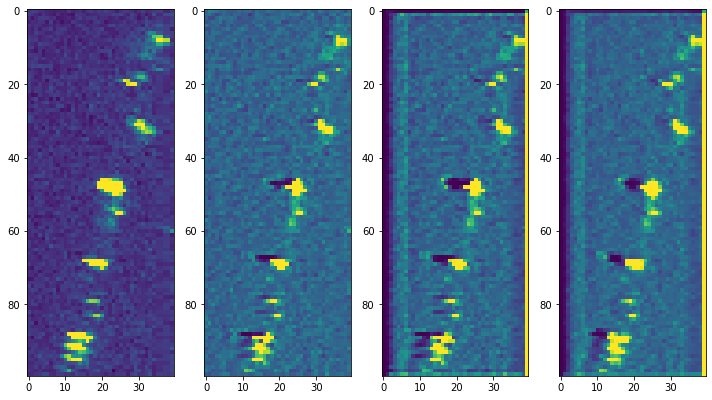

In [2]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt

import examplesetup
import lib.deconvolution as deconvolution
import lib.utils as utils
import lib.xtrace as xtrace

project_dir = '/data/visitors/balder/20220115/2022022408'
experiment_dir = os.path.join(project_dir, 'raw/XRD Eiger Test')
poni_dir = os.path.join(project_dir, 'process')
data_layer = 9

config, data = utils.load_stack(
    os.path.join(experiment_dir, 'LaB6_9_data_000001.h5'),
    os.path.join(poni_dir, 'samuel_9_0.poni'),
)
img, mask = utils.mask(data[data_layer], False)

area = (slice(50,150), slice(220,260)) #(slice(300,400), slice(200,240))

recovered_img, G = utils.deconvolve(config, img, 1)
config_loc, img_loc = utils.local_transform(config, img, area)
recovered_local_img, G_loc = utils.deconvolve(config_loc, img_loc, 1)
zoom = 2
config_upsamp, img_upsamp = utils.upsample_transform(config_loc, img_loc, z=zoom)
recovered_img_upsamp_highres, G_upsamp = utils.deconvolve(config_upsamp, img_upsamp, 1)
recovered_img_upsamp = utils.downsample_img(recovered_img_upsamp_highres, z=zoom)

perc = np.percentile(img, 99)
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs[0].imshow(img[area], vmax=perc)
axs[1].imshow(recovered_img[area], vmax=perc)
axs[2].imshow(recovered_local_img, vmax=perc)
axs[3].imshow(recovered_img_upsamp, vmax=perc)
plt.tight_layout()